In [15]:
# Passo 1 e 2 da Instrução:

import pandas as pd

# Caminho para encontrar o arquivo Excel
file_path = 'C:/Users/Inteli/Desktop/doing-economics-Dataset Project 3.xlsx'

# Carregar o Excel
excel_data = pd.ExcelFile(file_path)

# Verificar as abas disponíveis
print("Abas disponíveis:", excel_data.sheet_names)

# Carregar a aba de dados
data_df = excel_data.parse('Data')

# Visualizar as primeiras linhas
print("\nVisualização inicial dos dados:\n", data_df.head())

# (i) Tabela de frequência por tipo de loja e período
store_period_pivot = pd.pivot_table(
    data_df, 
    values='store_id', 
    index='store_type', 
    columns='time', 
    aggfunc='count', 
    fill_value=0
)
# Exibir a tabela de frequência por tipo de loja e período
print("\n(i) Tabela de frequência por tipo de loja e período:")
display(store_period_pivot)

# (ii) Tabela de frequência por tipo de produto e período
product_period_pivot = pd.pivot_table(
    data_df, 
    values='product_id', 
    index='type', 
    columns='time', 
    aggfunc='count', 
    fill_value=0
)
print("\n(ii) Tabela de frequência por tipo de produto e período:")
display(product_period_pivot)
# Exibir a tabela de frequência por tipo de produto e período

# (iii) Tabela de frequência para produtos taxados por tipo de loja e período
taxed_pivot = pd.pivot_table(
    data_df, 
    values='product_id', 
    index='store_type', 
    columns=['time', 'taxed'], 
    aggfunc='count', 
    fill_value=0
)
print("\n(iii) Tabela de frequência de produtos taxados por tipo de loja e período:")
display(taxed_pivot)
# Exibir a tabela de frequência de produtos taxados por tipo de loja e período

# Salvar em novo arquivo Excel
output_file_path = 'C:/Users/Inteli/Desktop/Frequency_Tables.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    store_period_pivot.to_excel(writer, sheet_name='Store Type Frequency')
    product_period_pivot.to_excel(writer, sheet_name='Product Type Frequency')
    taxed_pivot.to_excel(writer, sheet_name='Taxed Frequency')

print(f"\nAs tabelas foram salvas no arquivo: {output_file_path}")

Abas disponíveis: ['Data Dictionary', 'Data']

Visualização inicial dos dados:
    store_id   type  store_type         type2   size  price  price_per_oz  price_per_oz_c  taxed  supp     time  product_id
0        16  WATER           2           NaN   33.8   1.69      0.050000        5.000000      0     0  DEC2014          29
1        16    TEA           2           NaN   23.0   0.99      0.043043        4.304348      1     0  DEC2014          32
2        16    TEA           2           NaN   23.0   0.99      0.043043        4.304348      1     0  DEC2014          33
3        16  WATER           2           NaN   33.8   1.69      0.050000        5.000000      0     0  DEC2014          38
4        16   MILK           2  LOW FAT MILK  128.0   3.79      0.029609        2.960938      0     0  DEC2014          40

(i) Tabela de frequência por tipo de loja e período:


time,DEC2014,JUN2015,MAR2015
store_type,,,
1,177,209,158
2,407,391,327
3,87,102,73
4,73,96,75



(ii) Tabela de frequência por tipo de produto e período:


time,DEC2014,JUN2015,MAR2015
type,,,
ENERGY,56,58,49
ENERGY-DIET,49,54,35
JUICE,70,64,52
JUICE DRINK,19,17,6
MILK,63,61,53
SODA,239,262,215
SODA-DIET,128,174,127
SPORT,11,16,12
SPORT-DIET,2,2,0



(iii) Tabela de frequência de produtos taxados por tipo de loja e período:


time       DEC2014      JUN2015      MAR2015     
taxed            0    1       0    1       0    1
store_type                                       
1               92   85     111   98      88   70
2              196  211     192  199     154  173
3               44   43      52   50      36   37
4               34   39      44   52      31   44


As tabelas foram salvas no arquivo: C:/Users/Inteli/Desktop/Frequency_Tables.xlsx


In [16]:
# Passo 3 da Instrução:

import pandas as pd

# Caminho para o arquivo de dados
file_path = 'C:/Users/Inteli/Desktop/doing-economics-Dataset Project 3.xlsx'

# Carregar o Excel
excel_data = pd.ExcelFile(file_path)

# Carregar a aba de dados
data_df = excel_data.parse('Data')

# Filtrar apenas os períodos relevantes: dezembro de 2014 e junho de 2015
filtered_df = data_df[data_df['time'].isin(['DEC2014', 'JUN2015'])].copy() 

# Criar coluna combinada com informação se o produto é taxado e o período
filtered_df.loc[:, 'taxed_time'] = filtered_df['taxed'].astype(str) + "_" + filtered_df['time']

# Criar Tabela Dinâmica (Pivot Table)
price_per_oz_pivot = pd.pivot_table(
    filtered_df,
    values='price_per_oz_c',
    index='store_type',
    columns='taxed_time',
    aggfunc='mean',
    fill_value=0
)

# Arredondar os valores para facilitar leitura
price_per_oz_pivot_rounded = price_per_oz_pivot.round(2)

# Exibir a tabela (caso esteja em ambiente interativo)
print("\nMédia do preço por onça (centavos), por tipo de loja e por status de taxação (apenas DEC2014 e JUN2015):")
display(price_per_oz_pivot_rounded)

# Exportar a tabela para um novo arquivo Excel
output_file_path = 'C:/Users/Inteli/Desktop/Mean_Price_Per_Oz_Filtered.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    price_per_oz_pivot_rounded.to_excel(writer, sheet_name='Mean Price per Oz')

print(f"\n📁 Tabela salva com sucesso em: {output_file_path}")


Média do preço por onça (centavos), por tipo de loja e por status de taxação (apenas DEC2014 e JUN2015):


taxed_time,0_DEC2014,0_JUN2015,1_DEC2014,1_JUN2015
store_type,,,,
1,8.87,9.73,11.14,11.94
2,11.73,12.54,12.43,14.03
3,9.67,10.16,11.78,10.69
4,15.80,13.54,15.46,14.81



📁 Tabela salva com sucesso em: C:/Users/Inteli/Desktop/Mean_Price_Per_Oz_Filtered.xlsx



Tabela com a variação de preços por onça (centavos), por tipo de loja e status de taxação:

 store_type  taxed  DEC2014  JUN2015  price_change tax_status store_type_str
          1      0     8.87     9.73          0.86 Não Taxado              1
          1      1    11.14    11.94          0.80     Taxado              1
          2      0    11.73    12.54          0.81 Não Taxado              2
          2      1    12.43    14.03          1.59     Taxado              2
          3      0     9.67    10.16          0.49 Não Taxado              3
          3      1    11.78    10.69         -1.09     Taxado              3
          4      0    15.80    13.54         -2.26 Não Taxado              4
          4      1    15.46    14.81         -0.65     Taxado              4

📁 Tabela salva com sucesso em: C:/Users/Inteli/Desktop/Price_Change_Per_Store_Tax_Status.xlsx


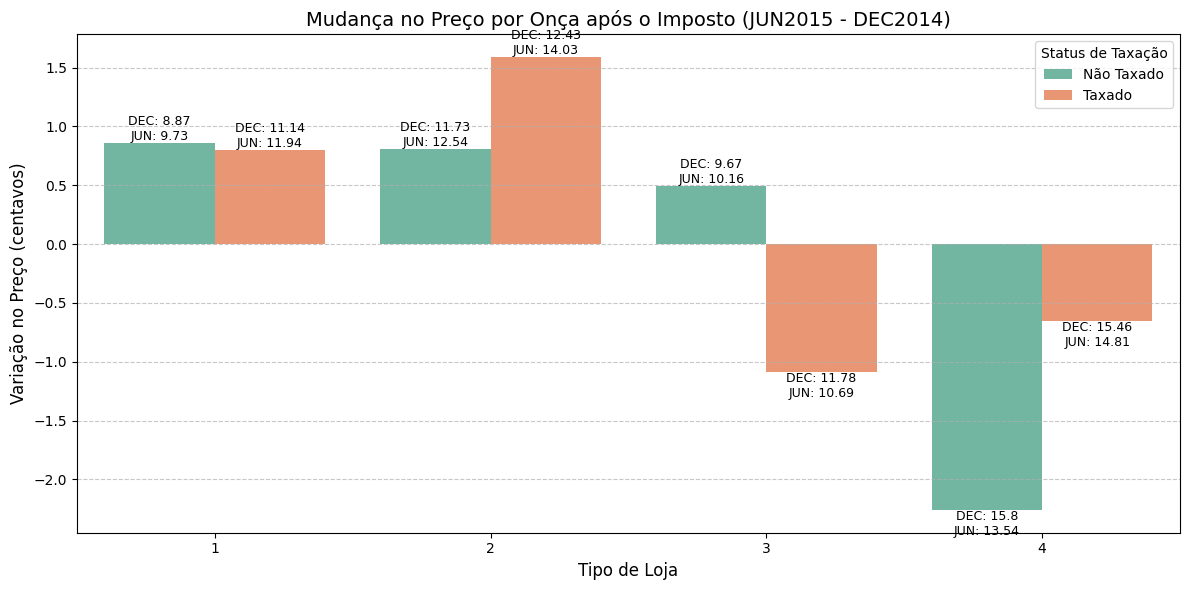

In [17]:
# Passo 4 da Instrução:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo de dados
file_path = 'C:/Users/Inteli/Desktop/doing-economics-Dataset Project 3.xlsx'

# Carregar o Excel
excel_data = pd.ExcelFile(file_path)

# Carregar a aba de dados
data_df = excel_data.parse('Data')

# Filtrar apenas os períodos relevantes: dezembro de 2014 e junho de 2015
filtered_df = data_df[data_df['time'].isin(['DEC2014', 'JUN2015'])].copy()

# Calcular a média do preço por onça por tipo de loja, status de taxação e tempo
mean_prices = filtered_df.groupby(['store_type', 'taxed', 'time'])['price_per_oz_c'].mean().reset_index()

# Criar tabela dinâmica com preços médios em DEC2014 e JUN2015
pivot_table = mean_prices.pivot(index=['store_type', 'taxed'], columns='time', values='price_per_oz_c').reset_index()

# Calcular a mudança de preço: JUN2015 - DEC2014
pivot_table['price_change'] = pivot_table['JUN2015'] - pivot_table['DEC2014']

# Criar rótulos para visualização no gráfico
pivot_table['tax_status'] = pivot_table['taxed'].map({0: 'Não Taxado', 1: 'Taxado'})
pivot_table['store_type_str'] = pivot_table['store_type'].astype(str)

# Arredondar a tabela para facilitar leitura
pivot_table_rounded = pivot_table.copy()
pivot_table_rounded[['DEC2014', 'JUN2015', 'price_change']] = pivot_table_rounded[['DEC2014', 'JUN2015', 'price_change']].round(2)

# Exibir a tabela no console com alinhamento
print("\nTabela com a variação de preços por onça (centavos), por tipo de loja e status de taxação:\n")
print(pivot_table_rounded.to_string(index=False))

# Exportar a tabela para Excel
output_path = 'C:/Users/Inteli/Desktop/Price_Change_Per_Store_Tax_Status.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    pivot_table_rounded.to_excel(writer, sheet_name='Price Change', index=False)

print(f"\n📁 Tabela salva com sucesso em: {output_path}")

# Plot do gráfico de colunas com anotação dos valores reais
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=pivot_table_rounded,
    x='store_type_str',
    y='price_change',
    hue='tax_status',
    palette='Set2'
)

# Adicionar os valores reais de DEC2014 e JUN2015 como anotação nas barras
for bars, tax_status in zip(barplot.containers, ['Não Taxado', 'Taxado']):
    for bar, row in zip(bars, pivot_table_rounded[pivot_table_rounded['tax_status'] == tax_status].itertuples()):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        dec = row.DEC2014
        jun = row.JUN2015
        texto = f"DEC: {dec}\nJUN: {jun}"
        alinhamento = 'bottom' if y >= 0 else 'top'
        plt.text(x, y, texto, ha='center', va=alinhamento, fontsize=9)

# Ajustes estéticos
plt.title('Mudança no Preço por Onça após o Imposto (JUN2015 - DEC2014)', fontsize=14)
plt.xlabel('Tipo de Loja', fontsize=12)
plt.ylabel('Variação no Preço (centavos)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status de Taxação')
plt.tight_layout()
plt.show()

Colunas disponíveis: Index(['year', 'quarter', 'month', 'location', 'beverage_group', 'tax', 'price', 'under_report'], dtype='object')

=== TABELA DE PREÇOS MÉDIOS ===
| month_year   |   Non-Berkeley | Untaxed |   Non-Berkeley | Taxed |   Berkeley | Untaxed |   Berkeley | Taxed |
|--------------|--------------------------|------------------------|----------------------|--------------------|
| 2013-01      |                  5.34864 |                7.99157 |              5.72248 |            8.6928  |
| 2013-02      |                  5.36386 |                8.18088 |              5.80647 |            8.65457 |
| 2013-03      |                  5.42451 |                8.18687 |              5.85825 |            8.82269 |
| 2013-04      |                  5.64346 |                8.24645 |              5.85834 |            9.02207 |
| 2013-05      |                  5.18173 |                7.75679 |              5.79133 |            8.67854 |
| 2013-06      |                  5.03197

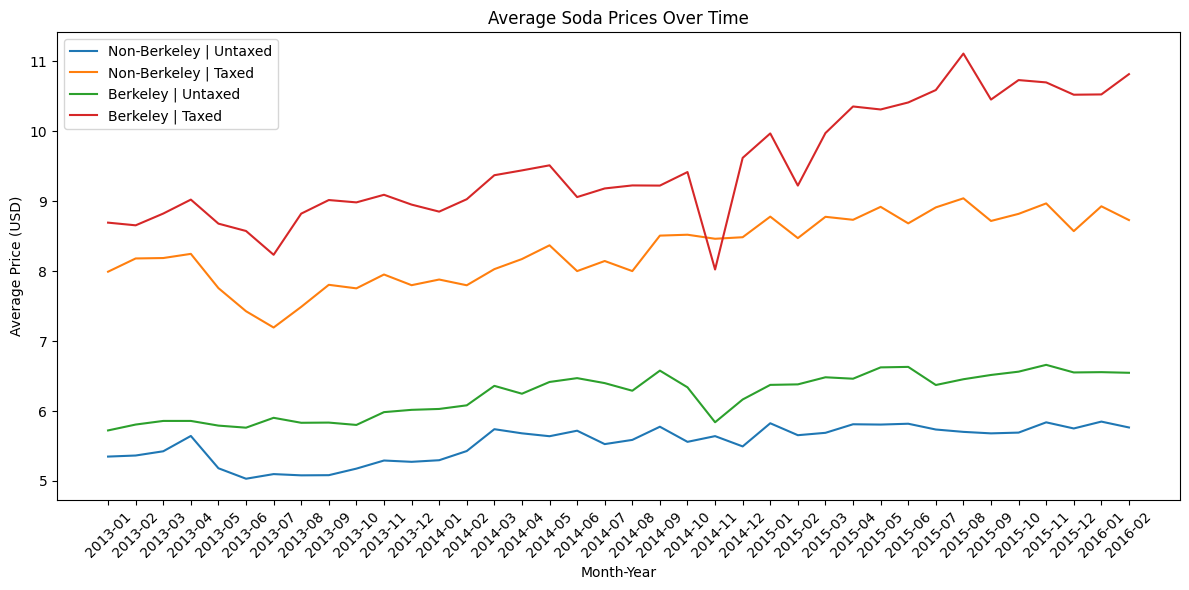

In [18]:
# Passo 5 da Instrução:

import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# 1. Carregar o arquivo Excel
file_path = 'C:/Users/Inteli/Desktop/doing-economics-project-3-2-datafile.xlsx'
df = pd.read_excel(file_path)

# (Opcional) Ver os nomes das colunas
print("Colunas disponíveis:", df.columns)

# 2. Criar coluna mês-ano (formato YYYY-MM)
df['month_year'] = pd.to_datetime(
    dict(year=df['year'], month=df['month'], day=1)
).dt.to_period('M').astype(str)

# 3. Variáveis-indicadoras
df['berkeley'] = df['location'] == 'Berkeley'
df['taxed']    = df['tax']      == 'Taxed'

# 4. PivotTable: média de preço por mês-ano, Berkeley vs não-Berkeley e Taxed vs Untaxed
pivot = (df.pivot_table(index='month_year',
                        columns=['berkeley', 'taxed'],
                        values='price',
                        aggfunc='mean')
           .sort_index())

# 5. Renomear as colunas para algo legível
pivot.columns = [f"{'Berkeley' if b else 'Non-Berkeley'} | "
                 f"{'Taxed' if t else 'Untaxed'}"
                 for b, t in pivot.columns]

# 6. Exibir tabela formatada com tabulate
pivot_df = pivot.reset_index()
print("\n=== TABELA DE PREÇOS MÉDIOS ===")
print(tabulate(pivot_df, headers='keys', tablefmt='github', showindex=False))

# 7. Plotar as quatro séries
plt.figure(figsize=(12, 6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)

plt.xlabel('Month-Year')
plt.ylabel('Average Price (USD)')
plt.title('Average Soda Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

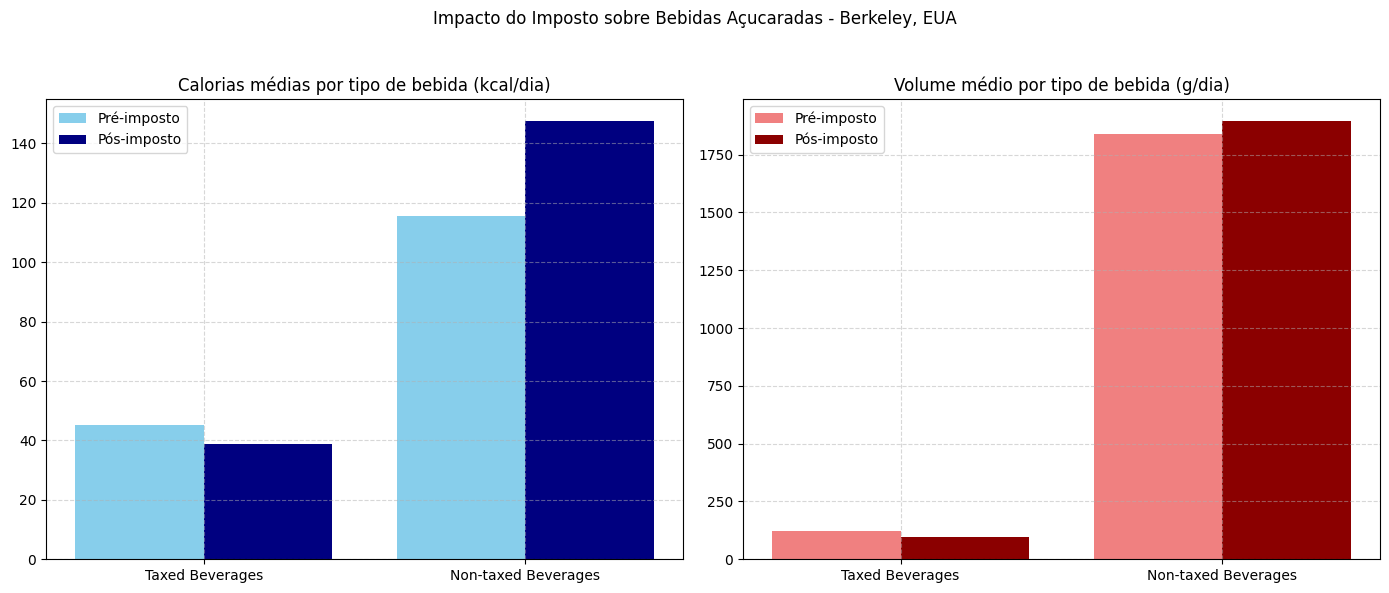

In [19]:
# Passo 6 da Instrução:

import matplotlib.pyplot as plt

# Dados da tabela extraídos manualmente
categories = ['Taxed Beverages', 'Non-taxed Beverages']

# Ingestão calórica antes e depois do imposto
calories_pre = [45.1, 115.7]
calories_post = [38.7, 147.6]

# Volume ingerido antes e depois do imposto
volume_pre = [121.0, 1839.4]
volume_post = [97.0, 1896.5]

# Configuração do gráfico: barras lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
x = range(len(categories))

# Gráfico da ingestão calórica
axs[0].bar([i - 0.2 for i in x], calories_pre, width=0.4, label='Pré-imposto', color='skyblue')
axs[0].bar([i + 0.2 for i in x], calories_post, width=0.4, label='Pós-imposto', color='navy')
axs[0].set_title('Calorias médias por tipo de bebida (kcal/dia)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(categories)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico do volume consumido
axs[1].bar([i - 0.2 for i in x], volume_pre, width=0.4, label='Pré-imposto', color='lightcoral')
axs[1].bar([i + 0.2 for i in x], volume_post, width=0.4, label='Pós-imposto', color='darkred')
axs[1].set_title('Volume médio por tipo de bebida (g/dia)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(categories)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Impacto do Imposto sobre Bebidas Açucaradas - Berkeley, EUA')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
